In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
tf.keras.utils.set_random_seed(123)

Mounted at /content/drive


In [2]:
trainDF = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/UCI_Sentiment_Analysis/bertEmbeddings_train.parquet")

testDF = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/UCI_Sentiment_Analysis/bertEmbeddings_test.parquet")

In [3]:
# Positve
trainDF[ trainDF["sentiment"] == 1 ].head(5)

,id,rating,sentiment,bertEmbeddings
0,1175,9,1,"[0.3903178, -0.47742915, 0.25363666, -0.254204..."
1,4383,9,1,"[-0.11558779, -0.13197686, 0.0900983, -0.20005..."
2,10044,9,1,"[0.04631238, -0.42852083, -0.116224274, 0.0827..."
3,4076,10,1,"[0.21556105, -0.22938758, 0.110332474, -0.1047..."
4,2662,10,1,"[0.049545724, -0.3437926, 0.17720522, -0.16182..."


In [4]:
# Negative
trainDF[ trainDF["sentiment"] == 0 ].head(5)

,id,rating,sentiment,bertEmbeddings
5,1930,4,0,"[0.19802946, -0.3788236, 0.09315217, -0.157547..."
6,1929,4,0,"[0.17231323, -0.36747223, -0.007838179, -0.192..."
9,7726,1,0,"[-0.049748953, -0.39186648, 0.036573753, 0.038..."
10,2981,1,0,"[0.103262655, -0.41156214, -0.040423006, -0.21..."
11,1048,4,0,"[0.08422632, -0.47291365, 0.19108963, -0.30217..."


In [5]:
X_train = np.stack(trainDF['bertEmbeddings'].to_numpy())
Y_train = trainDF["sentiment"].to_numpy()

X_test = np.stack(testDF['bertEmbeddings'].to_numpy())
Y_test = testDF["sentiment"].to_numpy()

x_train, x_validation, y_train, y_validation = train_test_split(X_train, Y_train, test_size=0.1, random_state = 123)

In [6]:
# BERT
print("BERT: {}".format(X_train.shape) )
print(X_train)

BERT: (25000, 1024)
[[ 0.3903178  -0.47742915  0.25363666 ... -0.00681179 -0.42341557
   0.0825469 ]
 [-0.11558779 -0.13197686  0.0900983  ...  0.32947674 -0.13200021
   0.06739458]
 [ 0.04631238 -0.42852083 -0.11622427 ...  0.22626854 -0.04362084
  -0.08778264]
 ...
 [ 0.1425161  -0.41769212  0.7285991  ...  0.14724533  0.52021843
   0.04973617]
 [ 0.28748444  0.20197561  0.00806705 ...  0.32413626  0.23726082
  -0.04666076]
 [ 0.02159226 -0.31894755  0.22249188 ...  0.37558782 -0.01174562
   0.38422117]]


0.84796


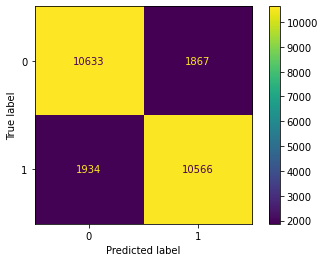

In [7]:
model_svm = SVC().fit(x_train, y_train)

y_predict = model_svm.predict(X_test)

matrix = confusion_matrix(Y_test, y_predict)

ConfusionMatrixDisplay(matrix).plot()

print( accuracy_score(Y_test, y_predict) )

              precision    recall  f1-score   support

    Negative       0.85      0.85      0.85     12500
    Positive       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



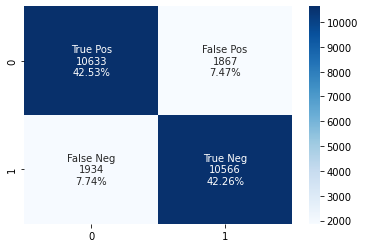

In [8]:
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

print( classification_report(Y_test, y_predict, target_names=['Negative', 'Positive']) )

0.85356


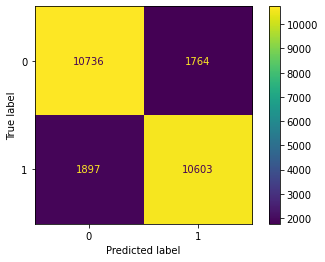

In [9]:
model_lg = LogisticRegression(solver="liblinear").fit(x_train, y_train)

y_predict = model_lg.predict(X_test)

matrix = confusion_matrix(Y_test, y_predict)

ConfusionMatrixDisplay(matrix).plot()

print( accuracy_score(Y_test, y_predict) )

              precision    recall  f1-score   support

    Negative       0.85      0.86      0.85     12500
    Positive       0.86      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



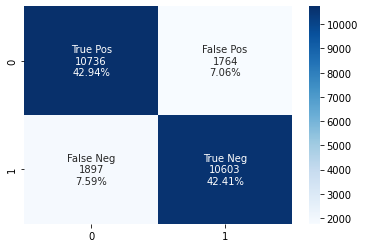

In [10]:
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

print( classification_report(Y_test, y_predict, target_names=['Negative', 'Positive']) )